# Y V S N Lokesh
Amrita Vishwa Vidhyapeetam - Amrithpuri
CSE-(AI) 2022-26

### Face recognition using Eigen Vectors

In [71]:
# importing required modules
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# plotting fucntion
def plot_face(X,name,l,b):
    plt.figure(figsize=(0.8, 0.8))
    plt.imshow(X.reshape(b,l))
    plt.title(name)
    plt.axis('off')
    plt.show()

# multiple faces plotting function
def plot_mul_faces(u,l,b):
    ig, axs = plt.subplots(1, len(u[1]), figsize=(38, 20))

    # Plot each image on a different subplot
    for i in range(len(u[1])):
        axs[i].imshow(np.array(u[:,i]).reshape((b, l)), )
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    plt.show()


# directory paths
train_images_dir_path='D://face recognition/clssfr_train/' # this has to be updated
test_images_dir_path='D://face recognition/clssfr_test/'  # this has t0 be updated

In [72]:
#TAKING IMAGES FOR TRAINING
train_images= []
train_names=[]
for filename in os.listdir(train_images_dir_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        image = Image.open(os.path.join(train_images_dir_path, filename))
        image = image.convert('L')
        l,b=image.size
        image=image.resize((l,b))
        vector = np.array(image).flatten()
        train_images.append(vector)
        train_names.append(filename[:-8])
        #plot_face(vector,'train_face {}'.format(i),l,b)
print(f'{len(train_images)} train images loaded')

#TAKING IMAGES FOR TESTING
test_images= []
test_names=[]
for filename in os.listdir(test_images_dir_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        image = Image.open(os.path.join(test_images_dir_path, filename))
        image = image.convert('L')
        l,b=image.size
        image=image.resize((l,b))
        vector = np.array(image).flatten()
        test_images.append(vector)
        test_names.append(filename[:-8])
        #plot_face(vector,'train_face {}'.format(i),l,b)
print(f'{len(test_images)} test images loaded')

57 train images loaded
19 test images loaded


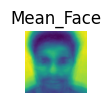

Standardized data diemntions :  (65536, 57)


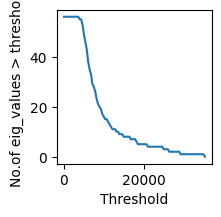

In [73]:
#MEAN FACE
images=np.array(train_images)
mean=np.mean(images,0)
plot_face(mean,"Mean_Face",l,b)

#STANDARDIZING THE DATA
std_data=images-mean
std_data=std_data.T
print("Standardized data diemntions : ",std_data.shape)

#APPLYING SVD
u,s,v=np.linalg.svd(std_data,full_matrices=False)

# Knowing the best value for considering the dimentions
# Calculate the threshold values
thresholds = np.linspace(s[-1], s[0], 100)

# Calculate the number of eigenvalues above each threshold value
num_eigvals_above_threshold = []
for threshold in thresholds:
    num_eigvals_above_threshold.append(np.sum(s> threshold))

# Plot the threshold graph
plt.figure(figsize=(2,2))
plt.plot(thresholds, num_eigvals_above_threshold)
plt.xlabel('Threshold')
plt.ylabel('No.of eig_values > threshold')
plt.show()



Eigen Faces


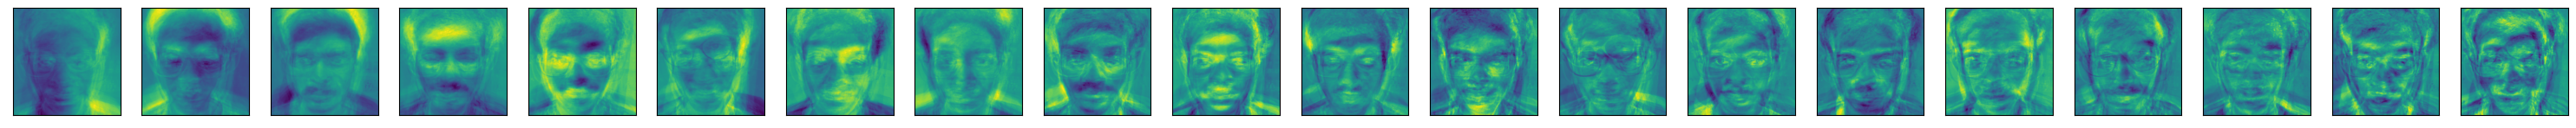

Training Matrix shape :  (1310720, 57)


In [74]:
#DIMENTIONALITY REDUCTION
u=u[:,:20]
print("Eigen Faces")
plot_mul_faces(u,l,b)


#FORMING TRAINING MATRIX
train_mat=np.empty(shape=(u.shape[0]*u.shape[1],std_data.shape[1]))
proj=np.empty(shape=(u.shape[0],u.shape[1]))
for i in range(std_data.shape[1]):
    for j in range(u.shape[1]):
        proj[:,j]=std_data[:,i]*u[:,j]
    proj_flatten=np.array(proj).flatten()
    train_mat[:,i]=proj_flatten[:]
print("Training Matrix shape : ",train_mat.shape)

# TESTING PART
predicted_faces,keys=[],[]
for i in range(len(test_images)):
    test_face = test_images[i]

    norm_test=test_face-mean #normalizing the testing vectors
    test_vect=np.empty(shape=(u.shape[0],u.shape[1]))
    for i in range(u.shape[1]):
        test_vect[:,i]=norm_test*u[:,i]
    test_vect_flatten=np.array(test_vect).flatten()

    norms=[]
    subtract=np.empty(shape=(u.shape[0]*u.shape[1],std_data.shape[1]))
    subtract_norm=np.empty(shape=(std_data.shape[1]))

    for i in range(std_data.shape[1]):subtract[:,i]=train_mat[:,i]-test_vect_flatten
    for j in range(subtract.shape[1]):subtract_norm[j]=np.linalg.norm(subtract[:,j]);norms.append(subtract_norm[j])

    key_face=norms.index(min(norms))
    keys.append(key_face)
    predicted_faces.append(train_names[key_face])

In [75]:
print("{:^15}-{:^15}\n".format("Actual_face","Predicted_face"))
for i in range(len(test_names)):
    print("{:^15}-{:^15}".format(test_names[i],predicted_faces[i]))
    #for plotting actual face and predicted face
    #plot_face(test_images[i],test_names[i],l,b)
    #plot_face(train_images[keys[i]],train_names[keys[i]],l,b)

accuracy = accuracy_score(test_names,predicted_faces)
print("\n\nThe accuracy of model is :",accuracy*100)

  Actual_face  -Predicted_face 

     AYUSH     -     AYUSH     
   BHEESHMA    -   BHEESHMA    
    DANUSH     -    DANUSH     
    HEMANTH    -    HEMANTH    
     JOGI      -   SHANMUKH    
  KARTHIKEYA   -  KARTHIKEYA   
     LEELA     -     LEELA     
     MADAN     -     RAHUL     
    MAHESH     -    MAHESH     
    NITISH     -    NITISH     
    PARTHIV    -    PARTHIV    
     RAHUL     -     RAHUL     
    SANJEEV    -    SANJEEV    
   SHANMUKH    -   SHANMUKH    
    SIDDHU     -   VAASANTH    
   SWAPNITH    -     LEELA     
     TEJA      -     MADAN     
   VAASANTH    -   VAASANTH    
    VIGNESH    -    VIGNESH    


The accuracy of model is : 73.68421052631578


In [76]:
# USING Support Vector Machine 

from sklearn import svm

model = svm.SVC()
model.fit(train_images,train_names)
y_pred  = model.predict(test_images)
accuracy = model.score(test_images, test_names)
print("Accuracy:", accuracy*100)

Accuracy: 78.94736842105263
